In [7]:
import pandas as pd 
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt 
import plotly.express as px 

In [8]:
df = pd.read_excel(r"C:\Users\ASUS\Downloads\Online Retail.xlsx")

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


In [5]:
df.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [6]:
df.duplicated().sum()

np.int64(5268)

In [7]:
df.drop_duplicates(inplace = True , ignore_index=True )

In [8]:
df.dropna(axis = 0 , inplace = True , ignore_index=True )

In [10]:
df.drop(['StockCode' , 'Description'] , axis = 1 , inplace = True )

In [12]:
df['Country'].value_counts()

Country
United Kingdom          356728
Germany                   9480
France                    8475
EIRE                      7475
Spain                     2528
Netherlands               2371
Belgium                   2069
Switzerland               1877
Portugal                  1471
Australia                 1258
Norway                    1086
Italy                      803
Channel Islands            757
Finland                    695
Cyprus                     611
Sweden                     461
Austria                    401
Denmark                    389
Japan                      358
Poland                     341
USA                        291
Israel                     247
Unspecified                241
Singapore                  229
Iceland                    182
Canada                     151
Greece                     146
Malta                      127
United Arab Emirates        68
European Community          61
RSA                         58
Lebanon                     45


In [13]:
df = df[df['Country'] == 'United Kingdom']

In [15]:
df.drop(['Country'] , axis = 1 , inplace = True )

C:\Users\TarekZiad\AppData\Local\Temp\ipykernel_15640\2546215277.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [17]:
df.select_dtypes('number').describe()

,Quantity,UnitPrice,CustomerID
count,356728.000000,356728.000000,356728.000000
mean,11.198644,3.268255,15543.795284
std,264.998044,71.162330,1594.286219
min,-80995.000000,0.000000,12346.000000
25%,2.000000,1.250000,14191.000000
50%,4.000000,1.950000,15513.000000
75%,12.000000,3.750000,16931.000000
max,80995.000000,38970.000000,18287.000000


In [19]:
df[df['Quantity'] < 0]

,InvoiceNo,Quantity,InvoiceDate,UnitPrice,CustomerID
141,C536379,-1,2010-12-01 09:41:00,27.50,14527.0
154,C536383,-1,2010-12-01 09:49:00,4.65,15311.0
235,C536391,-12,2010-12-01 10:24:00,1.65,17548.0
236,C536391,-24,2010-12-01 10:24:00,0.29,17548.0
237,C536391,-24,2010-12-01 10:24:00,0.29,17548.0
...,...,...,...,...,...
401159,C581490,-11,2011-12-09 09:57:00,0.83,14397.0
401243,C581499,-1,2011-12-09 10:28:00,224.69,15498.0
401410,C581568,-5,2011-12-09 11:57:00,10.95,15311.0
401411,C581569,-1,2011-12-09 11:58:00,1.25,17315.0


In [20]:
df[df['InvoiceNo'] == 'C536391']

,InvoiceNo,Quantity,InvoiceDate,UnitPrice,CustomerID
235,C536391,-12,2010-12-01 10:24:00,1.65,17548.0
236,C536391,-24,2010-12-01 10:24:00,0.29,17548.0
237,C536391,-24,2010-12-01 10:24:00,0.29,17548.0
238,C536391,-24,2010-12-01 10:24:00,0.29,17548.0
239,C536391,-12,2010-12-01 10:24:00,3.45,17548.0
240,C536391,-12,2010-12-01 10:24:00,1.65,17548.0
241,C536391,-24,2010-12-01 10:24:00,1.65,17548.0


In [21]:
df[df['Quantity'] == -80995.000000	]

,InvoiceNo,Quantity,InvoiceDate,UnitPrice,CustomerID
401132,C581484,-80995,2011-12-09 09:27:00,2.08,16446.0


In [22]:
df[df['Quantity'] == 80995.000000	]

,InvoiceNo,Quantity,InvoiceDate,UnitPrice,CustomerID
401131,581483,80995,2011-12-09 09:15:00,2.08,16446.0


In [24]:
df.drop(df[df['Quantity'] <= 0 ].index , axis = 0 , inplace = True )

C:\Users\TarekZiad\AppData\Local\Temp\ipykernel_15640\3535129037.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [26]:
df[df['UnitPrice'] < 0]

,InvoiceNo,Quantity,InvoiceDate,UnitPrice,CustomerID


In [28]:
df.loc[ : , 'amount'] = df['Quantity'] * df['UnitPrice']

In [30]:
df.reset_index(inplace = True , drop = True )

In [32]:
df.columns 

Index(['InvoiceNo', 'Quantity', 'InvoiceDate', 'UnitPrice', 'CustomerID',
       'amount'],
      dtype='object')

In [35]:
df = df.groupby(['CustomerID','InvoiceDate','InvoiceNo'])['amount'].sum().reset_index()

In [51]:
np.max(df['InvoiceDate'].dt.year)

np.int32(2011)

In [58]:
datetime(2011 , 12 , 31).date()

datetime.date(2011, 12, 31)

In [61]:
from datetime import datetime

today = datetime(np.max(df['InvoiceDate'].dt.year) , 12 , 31).date()
today

datetime.date(2011, 12, 31)

In [43]:
df['InvoiceDate'].dt.strftime('%Y-%m')

0        2011-01
1        2010-12
2        2010-12
3        2011-01
4        2011-03
          ...   
16671    2011-11
16672    2011-12
16673    2011-05
16674    2011-10
16675    2011-10
Name: InvoiceDate, Length: 16676, dtype: object

In [62]:
(today - df['InvoiceDate'].dt.date)

0        347 days, 0:00:00
1        391 days, 0:00:00
2        383 days, 0:00:00
3        345 days, 0:00:00
4        305 days, 0:00:00
               ...        
16671     31 days, 0:00:00
16672     25 days, 0:00:00
16673    223 days, 0:00:00
16674     80 days, 0:00:00
16675     64 days, 0:00:00
Name: InvoiceDate, Length: 16676, dtype: object

In [63]:
df.groupby(['CustomerID'])['InvoiceNo'].count()

CustomerID
12346.0      1
12747.0     11
12748.0    211
12749.0      5
12820.0      4
          ... 
18280.0      1
18281.0      1
18282.0      2
18283.0     16
18287.0      3
Name: InvoiceNo, Length: 3921, dtype: int64

In [64]:
df.groupby(['CustomerID'])['amount'].sum()

CustomerID
12346.0    77183.60
12747.0     4196.01
12748.0    33053.19
12749.0     4090.88
12820.0      942.34
             ...   
18280.0      180.60
18281.0       80.82
18282.0      178.05
18283.0     2045.53
18287.0     1837.28
Name: amount, Length: 3921, dtype: float64

In [74]:
rfm = df.groupby(['CustomerID']).agg(
    {
        'InvoiceDate' : lambda x : (today - x.max().date()).days,
        'InvoiceNo' : lambda x : x.count(),
        'amount' : lambda x : x.sum()
    }
).rename(mapper = {
    'InvoiceDate' : 'Recency',
    'InvoiceNo' : 'Frequency',
    'amount' : 'Montery'
} , axis = 1 ).reset_index()

rfm

,CustomerID,Recency,Frequency,Montery
0,12346.0,347,1,77183.60
1,12747.0,24,11,4196.01
2,12748.0,22,211,33053.19
3,12749.0,25,5,4090.88
4,12820.0,25,4,942.34
...,...,...,...,...
3916,18280.0,299,1,180.60
3917,18281.0,202,1,80.82
3918,18282.0,29,2,178.05
3919,18283.0,25,16,2045.53


In [68]:
df[df['CustomerID'] == 12748.0]['InvoiceDate'].max()

Timestamp('2011-12-09 12:20:00')

In [89]:
rfm['r_score'] = pd.qcut(rfm['Recency'] , 5 , [5 ,4 ,3 ,2 ,1 ]).astype(int)

rfm['f_score'] = pd.qcut(rfm['Frequency'] , 5 , [1,2,3,4 ] , duplicates='drop' ).astype(int)

rfm['m_score'] = pd.qcut(rfm['Montery'] , 5 , [1,2,3,4,5 ]).astype(int)

In [92]:
rfm['score'] = (rfm['r_score'] + rfm['f_score'] + rfm['m_score']) / 3 

In [94]:
rfm['score']

0       2.333333
1       4.666667
2       4.666667
3       4.333333
4       4.000000
          ...   
3916    1.000000
3917    1.000000
3918    2.333333
3919    4.666667
3920    3.000000
Name: score, Length: 3921, dtype: float64

In [97]:
rfm['segments'] = pd.qcut(rfm['score'] , 4 , [ 'bronze' , 'silver' , 'gold' , 'platenium'])

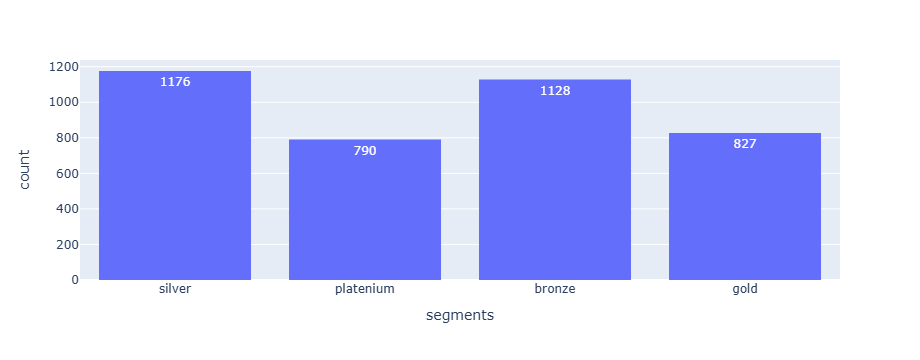

In [100]:
px.histogram(data_frame=rfm , x = 'segments' , text_auto=True )

In [102]:
rfm[rfm['segments'] == 'silver'].describe()

,CustomerID,Recency,Frequency,Montery,r_score,f_score,m_score,score
count,1176.000000,1176.000000,1176.00000,1176.000000,1176.000000,1176.000000,1176.000000,1176.000000
mean,15584.069728,95.306973,1.94898,743.024041,2.986395,1.299320,2.619048,2.301587
std,1571.828820,66.788891,0.96533,2852.408127,1.106954,0.572147,0.962856,0.273897
min,12346.000000,23.000000,1.00000,0.000000,1.000000,1.000000,1.000000,2.000000
25%,14229.000000,47.000000,1.00000,324.240000,2.000000,1.000000,2.000000,2.000000
50%,15594.500000,75.000000,2.00000,508.800000,3.000000,1.000000,3.000000,2.333333
75%,16937.750000,118.000000,2.00000,750.650000,4.000000,1.000000,3.000000,2.666667
max,18282.000000,394.000000,7.00000,77183.600000,5.000000,4.000000,5.000000,2.666667


### DBSCAN

In [108]:
from sklearn.cluster import DBSCAN , KMeans , AgglomerativeClustering

from sklearn.pipeline import make_pipeline

from sklearn.decomposition import PCA

from sklearn.preprocessing import StandardScaler

from sklearn.metrics import silhouette_score

In [105]:
rfm = rfm[['Recency',	'Frequency',	'Montery']]

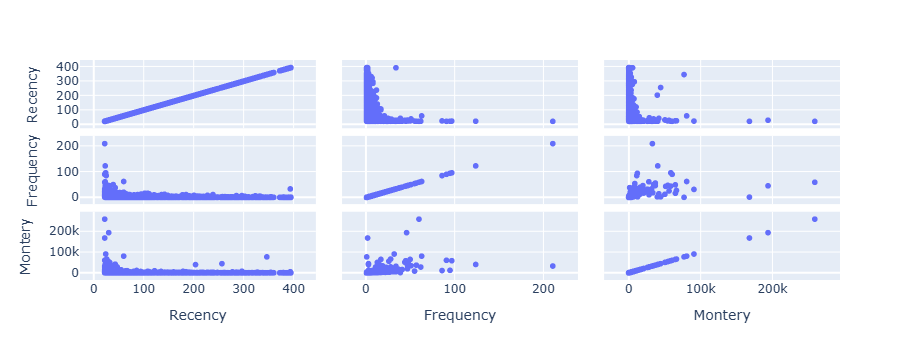

In [106]:
px.scatter_matrix(data_frame=rfm)

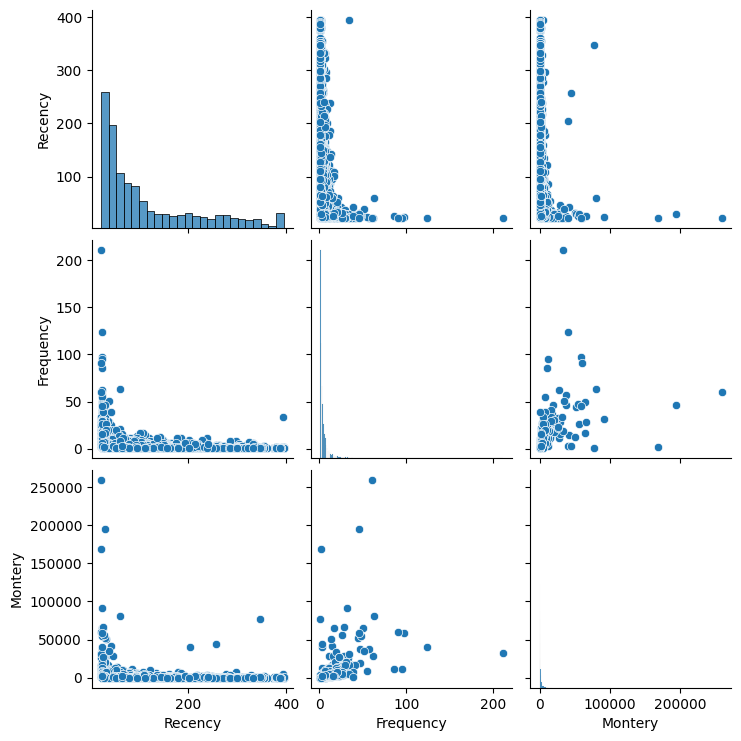

In [107]:
sns.pairplot(rfm)

In [109]:
pca = PCA(n_components=2)
tmp = pd.DataFrame(pca.fit_transform(rfm) , columns=['comp1' , 'comp2'])

In [110]:
tmp

,comp1,comp2
0,75325.126455,363.324812
1,2338.213100,-85.779620
2,31195.448390,-41.051266
3,2233.078611,-84.868682
4,-915.456851,-90.288181
...,...,...
3916,-1677.668061,182.410197
3917,-1777.281176,85.249640
3918,-1679.753485,-87.577115
3919,187.737264,-88.568946


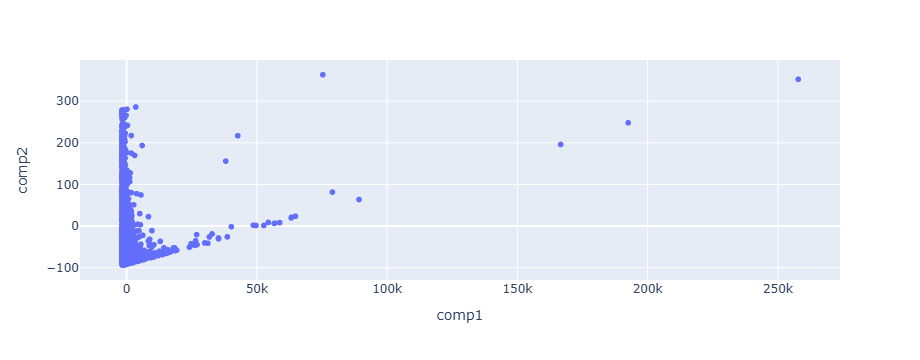

In [111]:
px.scatter(data_frame=tmp , x = 'comp1' , y = 'comp2')

In [139]:
model = DBSCAN(eps=4 , min_samples=5)


# print(np.unique(model.fit_predict(tmp)))

tmp['C'] = model.fit_predict(tmp)

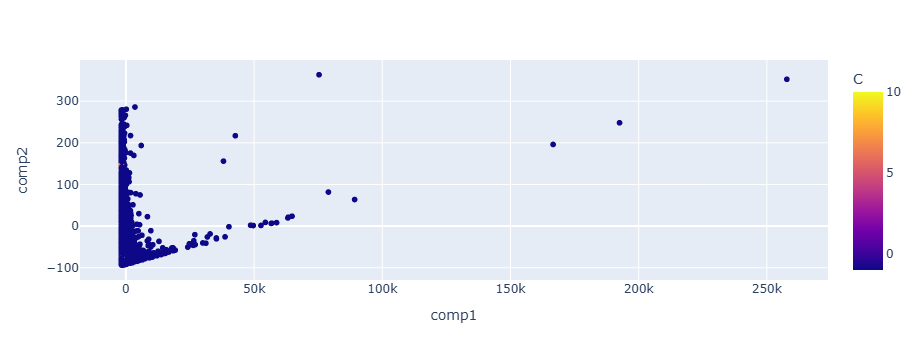

In [140]:
px.scatter(data_frame=tmp , x = 'comp1' , y = 'comp2' , color = 'C')